<a href="https://colab.research.google.com/github/sol-commits/deep_learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

# MNIST

In [1]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
X_train = X_train.reshape(60000, 28, 28, 1) # CNN 차원 맞춰주기 위하여
X_test = X_test.reshape(10000, 28, 28, 1)

## 모델 구성

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1, 1), padding='same',
                           activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(64, (2, 2), padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │       3,137,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,155,586 (12.04 MB)

 Trainable params: 3,155,586 (12.04 MB)

 Non-trainable params: 0 (0.00 B)

## 학습

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 161s 85ms/step - accuracy: 0.9247 - loss: 0.2443 - val_accuracy: 0.9833 - val_loss: 0.0538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.9864 - loss: 0.0424 - val_accuracy: 0.9895 - val_loss: 0.0319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 70ms/step - accuracy: 0.9900 - loss: 0.0296 - val_accuracy: 0.9888 - val_loss: 0.0370
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9906 - val_loss: 0.0278
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9878 - val_loss: 0.0457


## accuracy & loss

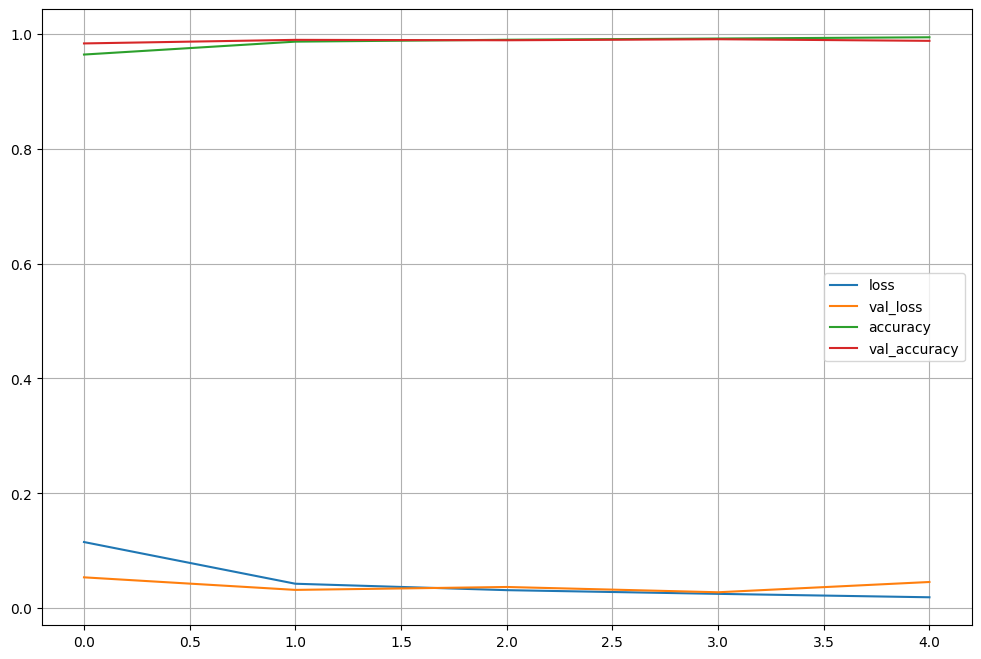

In [11]:
plot_target=['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [12]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9869 - loss: 0.0561
Test loss: 0.0457017719745636
Test accuracy: 0.9878000020980835


## 틀린 데이터 확인

In [16]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10], y_test[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [17]:
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

122

In [19]:
# 틀린 것 중에 16개만
import random

samples = random.choices(population=wrong_result, k=16)
samples

[9587,
 2130,
 8244,
 5997,
 6688,
 1900,
 4497,
 9749,
 445,
 2921,
 9982,
 1901,
 9792,
 3767,
 445,
 7928]

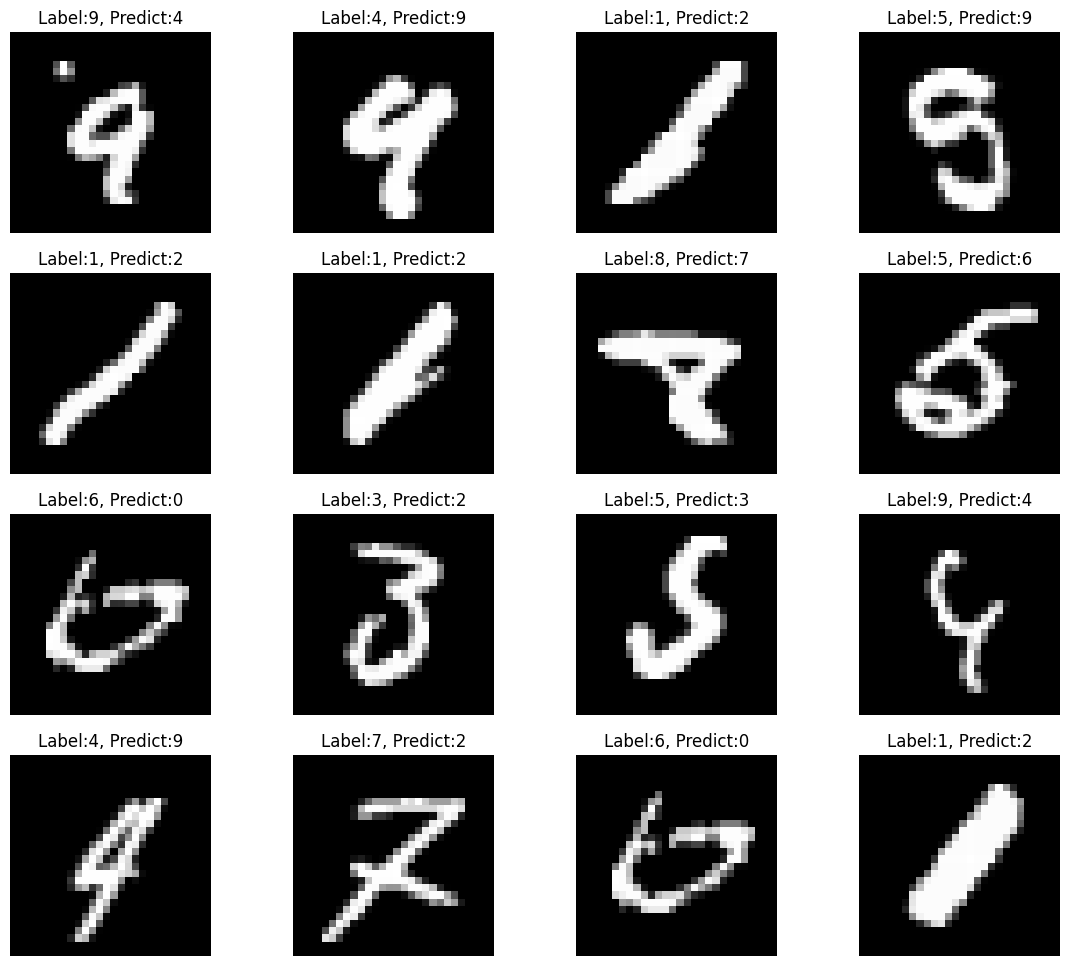

In [20]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_test[n].reshape(28, 28), cmap='gray', interpolation='nearest')
  plt.title(f'Label:{y_test[n]}, Predict:{predicted_labels[n]}')
  plt.axis('off')

plt.show()

In [21]:
model.save('MNIST_CNN_model.h5')

# Fashion MNIST

In [22]:
mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

X_train = X_train.reshape(60000, 28, 28, 1) # CNN 차원 맞춰주기 위하여
X_test = X_test.reshape(10000, 28, 28, 1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 모델 구성

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1, 1), padding='same',
                           activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(64, (2, 2), padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       3,137,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,155,586 (12.04 MB)

 Trainable params: 3,155,586 (12.04 MB)

 Non-trainable params: 0 (0.00 B)

## 학습

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 75ms/step - accuracy: 0.8244 - loss: 0.4853 - val_accuracy: 0.8966 - val_loss: 0.2776
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 74ms/step - accuracy: 0.9088 - loss: 0.2472 - val_accuracy: 0.9091 - val_loss: 0.2464
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 72ms/step - accuracy: 0.9247 - loss: 0.2028 - val_accuracy: 0.9113 - val_loss: 0.2559
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 72ms/step - accuracy: 0.9347 - loss: 0.1718 - val_accuracy: 0.9148 - val_loss: 0.2481
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 74ms/step - accuracy: 0.9453 - loss: 0.1460 - val_accuracy: 0.9177 - val_loss: 0.2454


## accuracy & loss

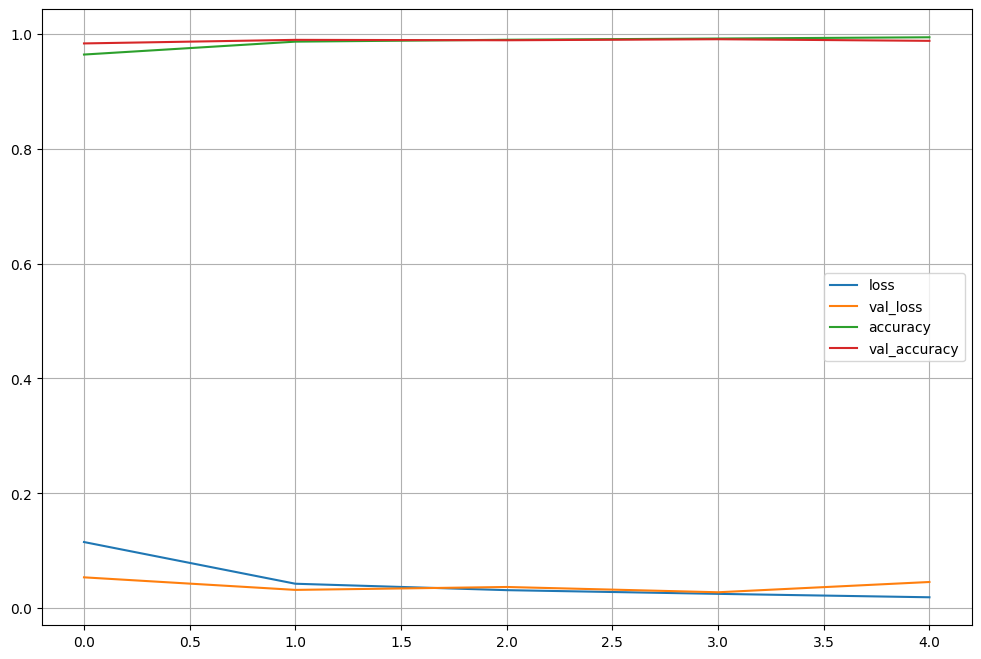

In [ ]:
plot_target=['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
  plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9869 - loss: 0.0561
Test loss: 0.0457017719745636
Test accuracy: 0.9878000020980835


## 틀린 데이터 확인

In [ ]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10], y_test[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [ ]:
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_labels[n] != y_test[n]:
    wrong_result.append(n)

len(wrong_result)

122

In [ ]:
# 틀린 것 중에 16개만
import random

samples = random.choices(population=wrong_result, k=16)
samples

[9587,
 2130,
 8244,
 5997,
 6688,
 1900,
 4497,
 9749,
 445,
 2921,
 9982,
 1901,
 9792,
 3767,
 445,
 7928]

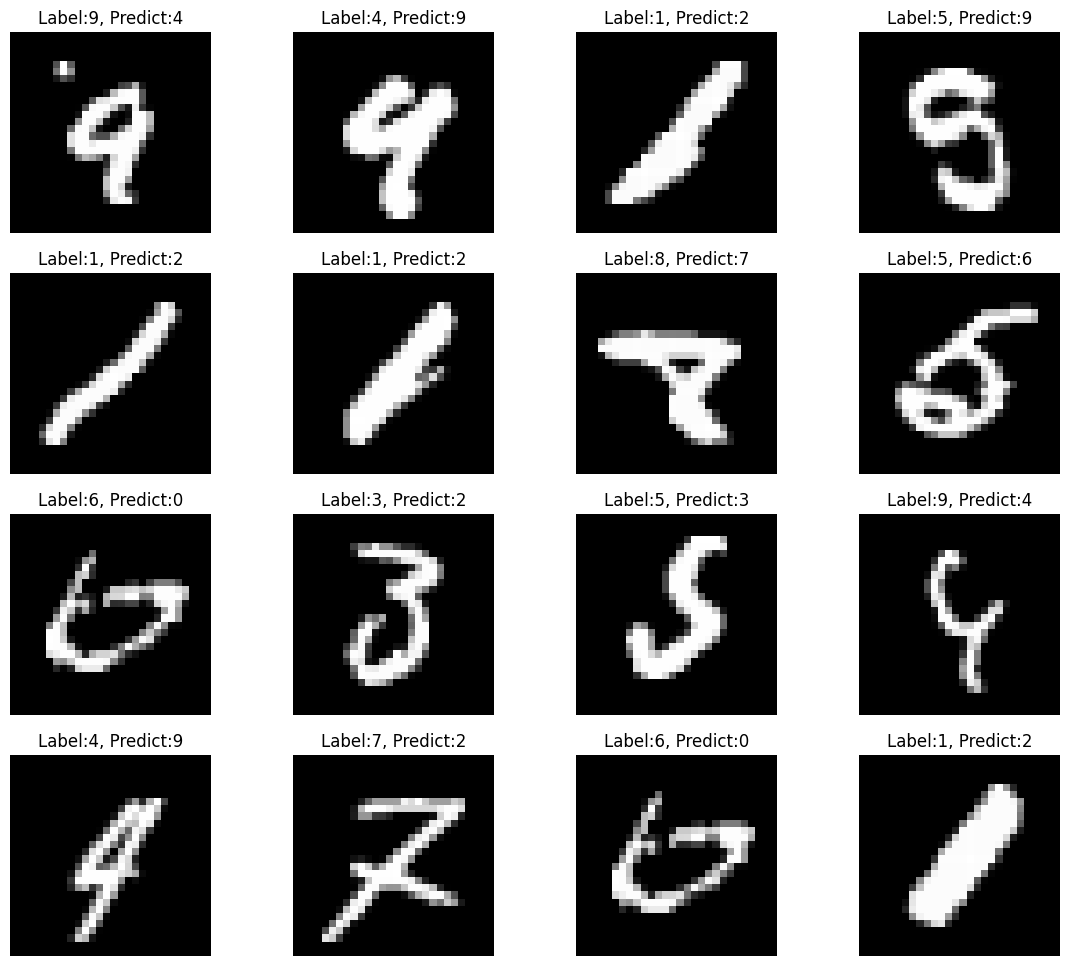

In [ ]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_test[n].reshape(28, 28), cmap='gray', interpolation='nearest')
  plt.title(f'Label:{y_test[n]}, Predict:{predicted_labels[n]}')
  plt.axis('off')

plt.show()

In [ ]:
model.save('MNIST_CNN_model.h5')

# Face Mask Detection

[kaggle](https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset)


In [2]:
# !unzip -qq "/content/drive/MyDrive/my_ws/edu/deep_learning/data/archive.zip"

In [1]:
import numpy as np
import pandas as pd
import os
import glob

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/content/drive/MyDrive/my_ws/edu/deep_learning/data/Face Mask Dataset/'
dataset = {
    'image_path': [],
    'mask_status': [],
    'where': []
}

for where in os.listdir(data_path):
  for status in os.listdir(data_path + where):
    for image in glob.glob(os.path.join(data_path + where, status, '*.png')):
      dataset['image_path'].append(image)
      dataset['mask_status'].append(status)
      dataset['where'].append(where)

df = pd.DataFrame(dataset)
df.head()

,image_path,mask_status,where
0,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithoutMask,Validation
1,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithoutMask,Validation
2,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithoutMask,Validation
3,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithoutMask,Validation
4,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithoutMask,Validation


In [3]:
len(df)

11792

With Mask 5909
Without Mask 5883


<Axes: xlabel='mask_status', ylabel='count'>

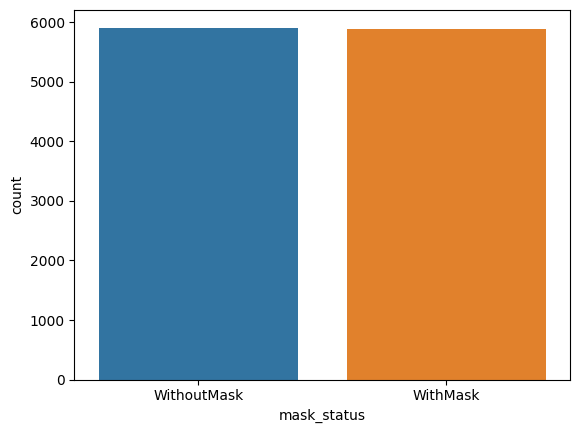

In [4]:
print('With Mask', df.value_counts('mask_status').iloc[0])
print('Without Mask', df.value_counts('mask_status').iloc[1])

sns.countplot(x=df['mask_status'], hue=df['mask_status'])

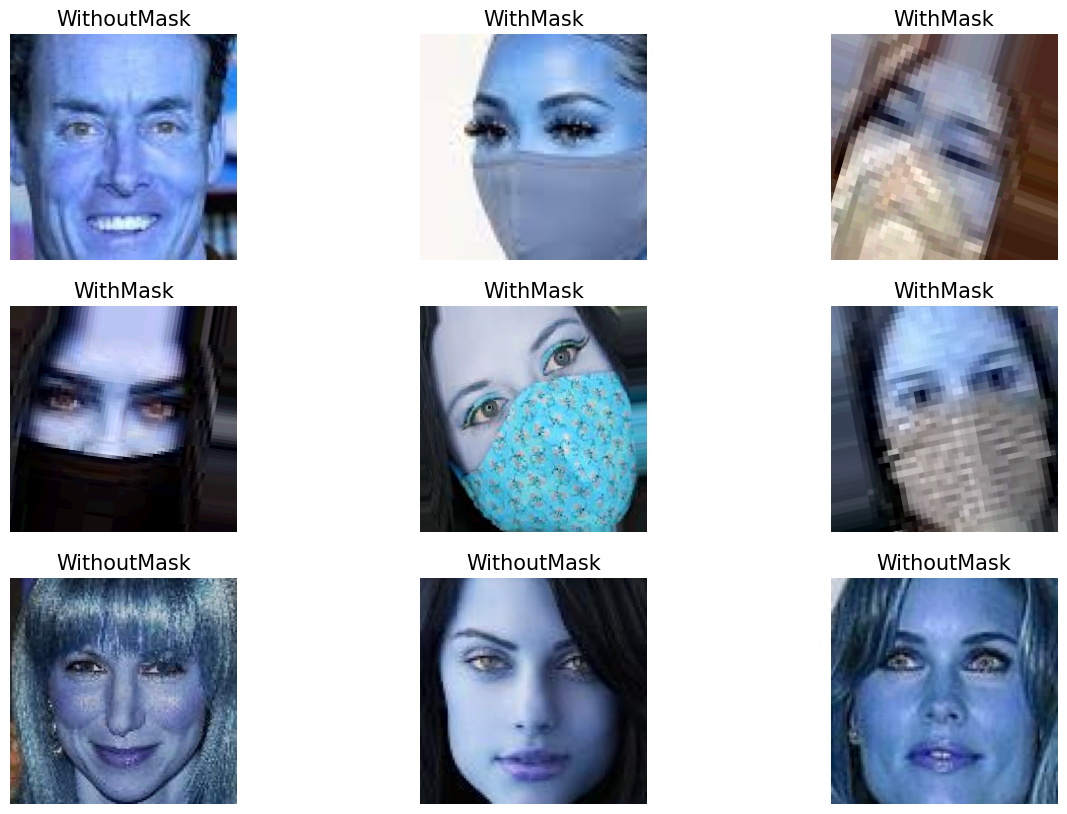

In [5]:
import cv2

plt.figure(figsize=(15, 10))

for i in range(9):
  random = np.random.randint(1, len(df))
  plt.subplot(3, 3, i+1)
  plt.imshow(cv2.imread(df.loc[random, 'image_path']))
  plt.title(df.loc[random, 'mask_status'], size=15)
  plt.axis('off')

plt.show()

## trai, test, validation 데이터 분리

In [6]:
df['where'].unique()

array(['Validation', 'Test', 'Train'], dtype=object)

In [7]:
train_df = df[df['where'] == 'Train']
test_df = df[df['where'] == 'Test']
valid_df = df[df['where'] == 'Validation']

print(train_df.head(10))
print(len(train_df), len(test_df), len(valid_df))

                                             image_path mask_status  where
1792  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1793  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1794  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1795  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1796  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1797  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1798  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1799  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1800  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
1801  /content/drive/MyDrive/my_ws/edu/deep_learning...    WithMask  Train
10000 992 800


Text(0.5, 1.0, 'Validation Data')

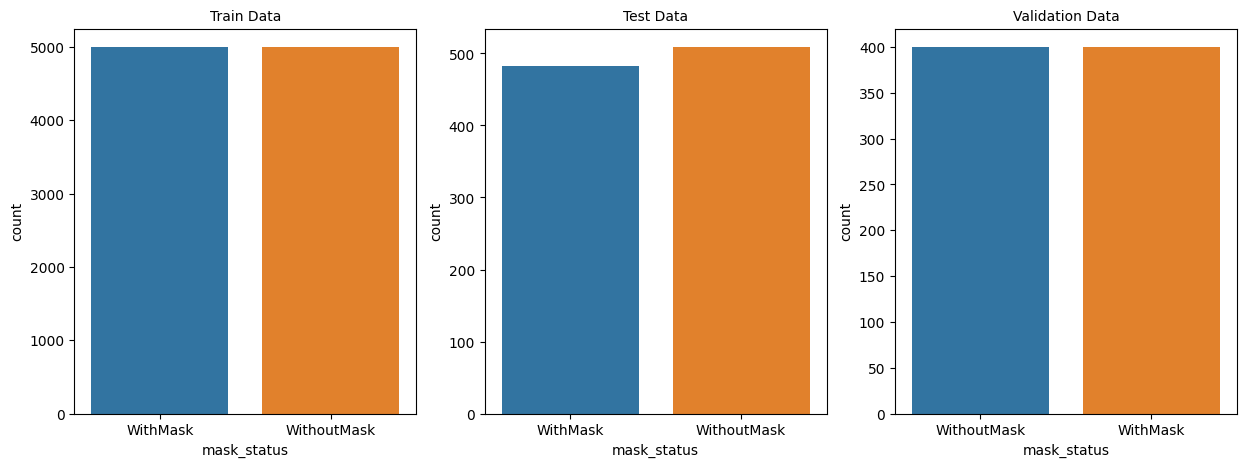

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.countplot(x=train_df['mask_status'], hue=train_df['mask_status'])
plt.title('Train Data', fontsize=10)

plt.subplot(132)
sns.countplot(x=test_df['mask_status'], hue=test_df['mask_status'])
plt.title('Test Data', fontsize=10)

plt.subplot(133)
sns.countplot(x=valid_df['mask_status'], hue=valid_df['mask_status'])
plt.title('Validation Data', fontsize=10)

In [9]:
train_df = train_df.reset_index(drop=True)
train_df.head()

,image_path,mask_status,where
0,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithMask,Train
1,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithMask,Train
2,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithMask,Train
3,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithMask,Train
4,/content/drive/MyDrive/my_ws/edu/deep_learning...,WithMask,Train


- 이 이후부터는 너무 오래 걸려서 코드만 기록함

In [12]:
data=[]
image_size=150

for i in range(len(train_df)):
  ## converting the image into grayscale
  img_array = cv2.imread(train_df.loc[i, 'image_path'], cv2.IMREAD_GRAYSCALE)

  ## resizing the array
  new_image_array = cv2.resize(img_array, (image_size, image_size))

  ## encoding the image with the label
  if train_df.loc[i, 'mask_status'] == 'WithMask':
    data.append([new_image_array, 1])
  else:
    data.append([new_image_array, 0])

KeyboardInterrupt: 

In [ ]:
# data 섞음
np.random.shuflfle(data)

In [ ]:
# 현재까지 데이터 확인
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
for row in range(2):
  for col in range(3):
    image_index = row*100 + col

    ax[row, col].axis('off')
    ax[row, col].imshow(data[image_index][0], cmap='gray')

    if data[image_index][1] == 0:
      ax[row, col].set_title('Without Mask')
    else:
      ax[row, col].set_title('With Mask')

plt.show()

In [ ]:
X = []
y = []

for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

In [ ]:
# test, train 으로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

## 모델 구성

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32,
                  kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(150, 150, 1)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Conv2D(64, (2, 2), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

### 파라미터 설정

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

## 학습

In [ ]:
X_train = X_train.reshape(len(X_train), X_trian.shpe[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shpe[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=5, batch_size=32)

## accuracy & loss

In [ ]:
model.evaluate(X_val, y_val)

## confusion matrix

In [ ]:
from.metrics import classification_report, confusion_matrix

prediction = (model.predict(X_val) > 0.5).astype('int32')

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))